[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/PennNGG/Quantitative-Neuroscience/blob/master/Probability%20Distributions/Python/Binomial.ipynb)

# Definition

The binomial distribution is a discrete probability distribution that describes the probability of obtaining exactly k successes out of n Bernoulli trials, which are individual binary outcomes that each have a success probability of p. For example, if you flip a coin 10 times, what is the probability that it will come up heads 0, 1, 2, ... 10 times?

Mathematically, this distribution defines the probability of obtaining *k* successes in *n* trials given a constant probability of success *p* on each trial, which is defined as:

[1] $P(X=k\: successes)=\left ( \frac{n}{k} \right )p^{k}\left ( 1-p \right )^{n-k}$

for *k* = 0, 1, 2, ... , *n*, and where

$\left ( \frac{n}{k} \right )=\frac{n!}{k!\left ( n-k \right )!}$

 is called the "binomial coefficient" and is pronounced "[n-choose-k](https://www.hackmath.net/en/calculator/n-choose-k)"

# Getting Started with Code


Matlab code is found in the [NGG Statistics GitHub Repository](https://github.com/PennNGG/Statistics.git) under "Probability Distributions/Binomial.m".

Python code is included below. First run the code cell just below to make sure all of the required Python modules are loaded, then you can run the other cell(s).

In [2]:
import numpy as np
import random as rnd
import collections
import matplotlib.pyplot as plt
import time
import scipy.stats as st

from scipy.stats import bernoulli, binom, poisson, chi2
from IPython.display import clear_output
from operator import itemgetter
from statsmodels.stats import proportion

from numpy import matlib

# Tutorial

In [ ]:
# Choose some values for the parameters n and p
p = 0.7
n = 1000

# Generate random picks. Note that this is as if we generated Bernoulli trials. Nota mia: Random picks as if you were running the experiemnt (random results given the parameters)
#   as above, but then just counted the successes in each "experiment"
num_successes = binom.rvs(n,p) # uses the "random variates" method (rvs) of binom #nota mia: this is to find k

# Print out the results
print(f'{num_successes} successes out of {n} trials, simulated p = {p:.4f}, empirical p = {num_successes/n:.4f}') #probability fraction of successful (out of N total)

697 successes out of 1000 trials, simulated p = 0.7000, empirical p = 0.6970


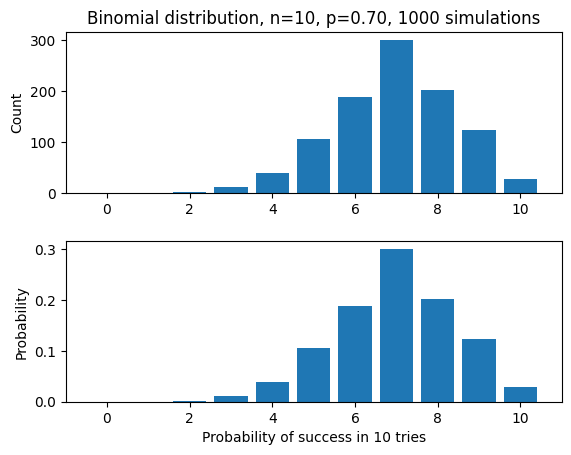

In [32]:
# The full probability distribution describes the probabilty of obtaining each
#   possible number of successes (k), given n and p. If we set n=10, the the
#   possible values of k are 0, 1, ..., 10. Now we use binom.rvs to simulate. #nota: this means that it calculates probability for each k value
#   many different picks to get a full distribution
p = 0.7
n = 10                      # number of "trials" per "experiment"
num_experiments = 1000;     # number of "experiments"
outcomes = binom.rvs(n,p,size=num_experiments)

#print(f'outcomes {outcomes}') #This are all the outcomes for 1000 experiments done where you stimulated neuron firing 10 times each (total number of successes for each experiment)

# Show a bar plot (histogram) of all of the possible outcomes
counts = collections.Counter(outcomes)
plt.subplot(211)
plt.bar(counts.keys(), counts.values())
plt.xlim([-1, n+1])
plt.title(f'Binomial distribution, n={n}, p={p:.2f}, {num_experiments} simulations')
plt.ylabel('Count')

# Show a normalized version that is a pdf. Here counts (the x-axis of the histogram)
#   is a DISCRETE variable, so we just have to add up the values
normalized_counts = {k: v / total for total in (sum(counts.values()),) for k, v in counts.items()}
plt.subplot(212)
plt.bar(normalized_counts.keys(), normalized_counts.values())
plt.xlim([-1, n+1])
plt.xlabel(f'Probability of success in {n} tries')
plt.ylabel('Probability')
plt.subplots_adjust(hspace=0.3)

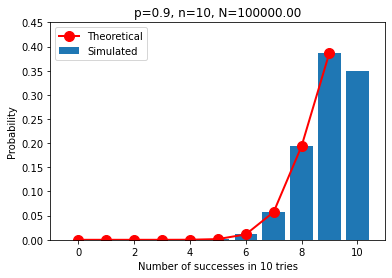

In [ ]:
# Now let's make a fun animation showing different values of p and N.
#   Note that, of course, the more picks you make of the random variable
#   (higher N), the more closely the outcomes (the "samples") match the true.     #NOTA: As N increases, the samples should match the true distribution more closely
#   distribution.
n=10
xs = range(0, n)
f = plt.figure()
for p in np.arange(0, 1, 0.1):
    for N in np.round(np.logspace(1,5,10)):

        # Get the true binomial pdf
        Y = binom.pmf(xs,n,p)

        # Get the random picks, make histogram and normalize
        counts = collections.Counter(binom.rvs(n,p,size=int(N)))
        normalized_counts = {k: v / total for total in (sum(counts.values()),) for k, v in counts.items()}

        # Show both
        plt.bar(normalized_counts.keys(), normalized_counts.values())
        plt.plot(xs, Y, 'ro-', linewidth=2, markersize=10)

        # Labels, etc
        plt.title(f'p={p:.1f}, n={n}, N={N:.2f}')
        plt.xlabel(f'Number of successes in {n} tries')
        plt.ylabel('Probability')
        plt.axis([-1, n+1, 0, 0.45])
        plt.legend(('Theoretical', 'Simulated'))
        plt.show()

        # Wait
        time.sleep(0.1)

        # Clear for next plot
        clear_output(wait=True)



In [ ]:
# The cumulative distribution function is just the proability of obtaining an
#   outcome that is equal to OR LESS THAN a particular value.
p = 0.7
n = 10                      # number of "trials" per "experiment"
num_experiments = 1000;     # number of "experiments"
outcomes = binom.rvs(n,p,size=num_experiments)

# Make histogram
counts = collections.Counter(outcomes)

# Unzip keys from values in a sorted order
keys, values = zip(*sorted(counts.items(), key=itemgetter(0)))
#Nota: Takes first thing from counts.items (0 = first position in the list)


# Compute the cumulative sum of the counts normalized by the total counts (so
#   it is a probability function and not just a histogram -- note that the final
#   value in the cdf should equal 1 because every value should be equal to or
#   less than that value).
total = sum(values)
cumulative_ps = [x/total for x in np.cumsum(values)]

# Plot as a bar graph
plt.bar(keys, cumulative_ps)

# Compare it to the real binomial cumulative distribution, which we find
#   using binom.cdf
Y = binom.cdf(keys,n,p)
plt.plot(keys, Y, 'ro-', linewidth=2, markersize=10)

# Labels, etc
plt.title(f'Cumulative binomial distribution, p={p:.1f}, n={n}, N={num_experiments}')
plt.xlabel(f'Number of successes in {n} tries')
plt.ylabel('Cumulative probability')
plt.legend(('Theoretical', 'Simulated'))

SyntaxError: invalid syntax. Perhaps you forgot a comma? (<ipython-input-1-3463c82fd279>, line 14)

# Neuroscience Example: Quantal Release

From: Johnson, E.W., and Wernig, A. (1971). [The binomial nature of transmitter release at the crayfish neuromuscular junction](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1331610/). J Physiol 218, 757-767.

Classic studies by [Bernard Katz and colleagues](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2151334/) indicated that chemical neurotransmitters are released from presynaptic nerve terminals in discrete quanta, or packets, with a relatively constant release probability. A straightforward implication of this idea is that the release statistics (i.e., the distribution of the number of quanta that are actually released in response to a given event like an action potential reaching the presynaptic nerve terminal) should follow a binomial distribution. As stated by Johnson and Wernig:

"If the average probability of release is constant, then it follows from the hypothesis that the relative frequency of 0, 1, 2, 3, . . . quantal releases in a series of trials is given by the successive terms in the binomial expansion $(p + q)^n$, where *q*=1–*p* is the average probability that a quantum will not be released. In a given trial, the probability that *x* quanta will be released (*px*) is given by the binomial term" [i.e., Eq. 1, above, but substitute *x* for *k*].

In other words, if there are *n* available quanta in a presynaptic terminal, and each is released with probability *p*, then the number of quanta that are actually released should follow a binomial distribution with parameters *n* and *p*.

Answers to the exercises below will be found [here](https://github.com/PennNGG/Quantitative-Neuroscience/tree/master/Answers%20to%20Exercises/Python) after the due date.

Exercise 1
Assume that there are 10 quanta available in a nerve terminal, and for a given release event each is released with a probability of 0.2. For one such event, what is the probability that 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, or 10 quanta will be released?

In [3]:
from scipy.stats import binom
#number of quanta
n =10

#Probability of release
p = 0.2

#Find k for 0-10 successes over these 10 trials (n)

#Defining range of k values
k_values = range(0, n+1)

for k in k_values:
  probability = binom.pmf(k,n,p)
  print(f"The probability of exactly {k} successes in {n} trials is {probability: .4f}")

The probability of exactly 0 successes in 10 trials is  0.1074
The probability of exactly 1 successes in 10 trials is  0.2684
The probability of exactly 2 successes in 10 trials is  0.3020
The probability of exactly 3 successes in 10 trials is  0.2013
The probability of exactly 4 successes in 10 trials is  0.0881
The probability of exactly 5 successes in 10 trials is  0.0264
The probability of exactly 6 successes in 10 trials is  0.0055
The probability of exactly 7 successes in 10 trials is  0.0008
The probability of exactly 8 successes in 10 trials is  0.0001
The probability of exactly 9 successes in 10 trials is  0.0000
The probability of exactly 10 successes in 10 trials is  0.0000


## Exercise 2
Let's say you know that a given nerve terminal contains exactly 14 quanta available for release. You have read in the literature that the release probability of these quanta is low, say 0.1. To assess whether this value is reasonable, you run a simple experiment: activate the nerve and measure the number of quanta that are released. The result is 8 quanta. What is the probability that you would get this result (8 quanta) if the true probability of release really was 0.1? What about if the true release probability was much higher; say, 0.7? What about for each decile of release probability (0.1, 0.2, ... 1.0)? Which value of release probability did you determine to be the most probable, given your measurement?

Note: here you are computing a likelihood function: a function describing how the value of the conditional probability *p*(*data* | *parameters*) changes when you hold your data fixed to the value(s) you measured and vary the value(s) of the parameter(s) of, in this case, the binomial distribution. Because you are varying the parameters and not the data, the values of the function are not expected to sum to one (e.g., you can have numerous parameters that have a very high probability of producing the given data) and thus this function is not a probability distribution (see [here](https://www.psychologicalscience.org/observer/bayes-for-beginners-probability-and-likelihood) for an extended discussion). The maximum value of this function is called the maximum likelihood.

In [37]:
import numpy as np

#Total number of quanta
n = 14

#Probability shown in literature
p = 0.1

#Number of successes
k = 8

#Probability of 8 successes out of 14 trials given p = 0.1
probability = binom.pmf(k,n,p)
print(f"The probability of exactly {k} successes in {n} trials is for p = 0.1 {probability: .4f}")

#Answer: It would be very unlikely that 8 out of 14 quanta would be released given a release probability of 0.1

#If probability was 0.7
p = 0.7

probability = binom.pmf(k,n,p)
print(f"The probability of exactly {k} sucesses in {n} trials is for  p = 0.7 {probability: .4f}")

#Answer: The probability of 8 quanta being released given a release probability of 0.7 is 0.1262


#Defining range of release probabilities
start = 0.0
stop = 1.1
increment = 0.1

#Defining list of probabilties
probabilities = []

#If probability ranged from 0.1 to 1.0
prob_values = np.arange(start, stop, increment)



#Calculate probability for each release probability of interest
for p in prob_values:
    probability = binom.pmf(k,n,p)
    probabilities.append(probability)
    print(f"The probability of exactly {k} successes in {n} trials with p={p:.1f} is {probability: .4f}")

max_probability = max(probabilities)
print(f"Most probable release probability is {(max_probability): .4f}")



The probability of exactly 8 successes in 14 trials is for p = 0.1  0.0000
The probability of exactly 8 sucesses in 14 trials is for  p = 0.7  0.1262
The probability of exactly 8 successes in 14 trials with p=0.0 is  0.0000
The probability of exactly 8 successes in 14 trials with p=0.1 is  0.0000
The probability of exactly 8 successes in 14 trials with p=0.2 is  0.0020
The probability of exactly 8 successes in 14 trials with p=0.3 is  0.0232
The probability of exactly 8 successes in 14 trials with p=0.4 is  0.0918
The probability of exactly 8 successes in 14 trials with p=0.5 is  0.1833
The probability of exactly 8 successes in 14 trials with p=0.6 is  0.2066
The probability of exactly 8 successes in 14 trials with p=0.7 is  0.1262
The probability of exactly 8 successes in 14 trials with p=0.8 is  0.0322
The probability of exactly 8 successes in 14 trials with p=0.9 is  0.0013
The probability of exactly 8 successes in 14 trials with p=1.0 is  0.0000
Most probable release probability is

## Exercise 3

Not feeling convinced by your single experiment (good scientist!), you repeat it under identical conditions. This time you measure 5 quanta that were released. Your sample size has now doubled, to two measurements. You now want to take into account both measurements when you assess the likelihoods of different possible values of the underlying release probability. To do so, assume that the two measurements in this sample are independent of one another; that is, the value of each result had no bearing on the other. In this case, the total likelihood is simply the product of the likelihoods associated with each separate measurement. It is also typical to compute the logarithm of each likelihood and take their sum, which is often more convenient. What are the values of the total likelihood and total log-likelihood in this example, if we assume that the true release probability is 0.1?

Of course, knowing those values of the likelihood and log-likelihood is not particularly useful until you can compare them to the values computed for other possible values for the release probability, so you can determine which value of release probability is most likely, given the data. Therefore, compute the full likelihood and log-likelihood functions using deciles of release probability between 0 and 1. What is the maximum value? Can you improve your estimate by computing the functions at a higher resolution? How does the estimate improve as you increase the sample size?

In [11]:
from scipy.stats import binom
import numpy as np


#Experiment 1: There were initially 14 quanta, where 8 were released

#Total number of quanta
n = 14

#Probability shown in literature
p = 0.1

#Number of successes for experiment 1
k1 = 8

#Probability of 8 successes out of 14 trials given p = 0.1
probability_1 = binom.pmf(k1,n,p)


#Experiment 2: There were initially 14 quanta (assuming identical initial conditions), where 5 were released

#Number of successes for experiment 2
k2 = 5

#Probability of 5 successes out of 14 trials given p = 0.1
probability_2 = binom.pmf(k2,n,p)

#Total likelihood
total_likelihood = probability_1 * probability_2

#Total log-likelihood
total_log_likelihood = np.log(probability_1) + np.log(probability_2)


print(f"The total_likelihood is {total_likelihood: .4f}")
print(f"The total log-likelihood is {total_log_likelihood: .4f}")

The total_likelihood is  0.0000
The total log-likelihood is -15.9047


In [15]:
#For increasing probability (p) from 0 to 1
# Total number of quanta
n = 14

# Initialize lists to store likelihoods and log-likelihoods
likelihoods = []
log_likelihoods = []

# Number of successes
k1 = 8
k2 = 5

# Iterate over p values from 0 to 1 in 0.1 increments
for p in np.arange(0, 1.1, 0.1):
    # Probability of k successes out of n trials given p
    probability_1 = binom.pmf(k1, n, p)
    probability_2 = binom.pmf(k2,n,p)
    total_likelihood = probability_1*probability_2
    total_log_likelihood = np.log(probability_1) + np.log(probability_2)
    likelihoods.append(total_likelihood)
    log_likelihoods.append(total_log_likelihood)
    print(f"For p = {p:.1f}:")
    print(f"The probability of exactly {k} successes in {n} trials is {probability_1:.4f} for experiment 1 and {probability_2:.4f} for experiment 2")
    print(f"The total likelihood taking into account probability 1 {probability_1: .4f} and probability 2 {probability_2:.4f} is {total_likelihood}")
    print(f"The total log-likelihood taking into account probability 1 {probability_1:.4f} and probability 2 {probability_2:.4f} is {total_log_likelihood:.4f}")


# Find the maximum value
max_likelihood = max(likelihoods)
max_log_likelihood = max(log_likelihoods)


print(f'Maximum likelihood: {max_likelihood:.4f}')
print(f'Maximum log-likelihood: {max_log_likelihood:.4f}')



For p = 0.0:
The probability of exactly 5 successes in 14 trials is 0.0000 for experiment 1 and 0.0000 for experiment 2
The total likelihood taking into account probability 1  0.0000 and probability 2 0.0000 is 0.0
The total log-likelihood taking into account probability 1 0.0000 and probability 2 0.0000 is -inf
For p = 0.1:
The probability of exactly 5 successes in 14 trials is 0.0000 for experiment 1 and 0.0078 for experiment 2
The total likelihood taking into account probability 1  0.0000 and probability 2 0.0078 is 1.2378187214998254e-07
The total log-likelihood taking into account probability 1 0.0000 and probability 2 0.0078 is -15.9047
For p = 0.2:
The probability of exactly 5 successes in 14 trials is 0.0020 for experiment 1 and 0.0860 for experiment 2
The total likelihood taking into account probability 1  0.0020 and probability 2 0.0860 is 0.0001732842750806352
The total log-likelihood taking into account probability 1 0.0020 and probability 2 0.0860 is -8.6606
For p = 0.3:
T

<ipython-input-15-9240143289f7>:19: RuntimeWarning: divide by zero encountered in log
  total_log_likelihood = np.log(probability_1) + np.log(probability_2)


In [17]:
#Increasing resolution
n=14
k1=8
k2=5
p = np.arange(0.1, 1, 0.05)  # Deciles of release probability

likelihoods = []
log_likelihoods = []

for i in p:
    probability1 = binom.pmf(k1, n, i)
    probability2 = binom.pmf(k2, n, i)
    total_likelihood = probability1 * probability2
    total_log_likelihood = np.log(probability1) + np.log(probability2)
    likelihoods.append(total_likelihood)
    log_likelihoods.append(total_log_likelihood)

# Find the maximum value
max_likelihood = max(likelihoods)
max_log_likelihood = max(log_likelihoods)

# Print the results
for i in range(len(p)):
    print(f'Probability of getting {k1} and {k2} successes with n = {n} and p = {p[i]:.1f}: Likelihood = {likelihoods[i]:.4f}, Log-likelihood = {log_likelihoods[i]:.4f}')

print(f'Maximum likelihood: {max_likelihood:.4f}')
print(f'Maximum log-likelihood: {max_log_likelihood:.4f}')

Probability of getting 8 and 5 successes with n = 14 and p = 0.1: Likelihood = 0.0000, Log-likelihood = -15.9047
Probability of getting 8 and 5 successes with n = 14 and p = 0.2: Likelihood = 0.0000, Log-likelihood = -11.4911
Probability of getting 8 and 5 successes with n = 14 and p = 0.2: Likelihood = 0.0002, Log-likelihood = -8.6606
Probability of getting 8 and 5 successes with n = 14 and p = 0.3: Likelihood = 0.0012, Log-likelihood = -6.7278
Probability of getting 8 and 5 successes with n = 14 and p = 0.3: Likelihood = 0.0046, Log-likelihood = -5.3925
Probability of getting 8 and 5 successes with n = 14 and p = 0.4: Likelihood = 0.0111, Log-likelihood = -4.5002
Probability of getting 8 and 5 successes with n = 14 and p = 0.4: Likelihood = 0.0190, Log-likelihood = -3.9649
Probability of getting 8 and 5 successes with n = 14 and p = 0.5: Likelihood = 0.0238, Log-likelihood = -3.7389
Probability of getting 8 and 5 successes with n = 14 and p = 0.5: Likelihood = 0.0224, Log-likelihood 

<ipython-input-17-dd2a8f1211f7>:55: RuntimeWarning: divide by zero encountered in log
  total_log_likelihood = np.log(probability_1) + np.log(probability_2)


In [20]:
# Initialize lists to store likelihoods and log-likelihoods
likelihoods = []
log_likelihoods = []

#For increasing probability (p) from 0 to 1
# Increased total number of quanta
n = 140

# Number of successes
k1 = 8
k2 = 5

# Iterate over p values from 0 to 1 in 0.1 increments
for p in np.arange(0, 1.1, 0.1):
    # Probability of k successes out of n trials given p
    probability_1 = binom.pmf(k1, n, p)
    probability_2 = binom.pmf(k2,n,p)
    total_likelihood = probability_1*probability_2
    total_log_likelihood = np.log(probability_1) + np.log(probability_2)
    likelihoods.append(total_likelihood)
    log_likelihoods.append(total_log_likelihood)
    print(f"For p = {p:.1f}:")
    print(f"The probability of exactly {k} successes in {n} trials is {probability_1:.4f} for experiment 1 and {probability_2:.4f} for experiment 2")
    print(f"The total likelihood taking into account probability 1 {probability_1: .4f} and probability 2 {probability_2:.4f} is {total_likelihood}")
    print(f"The total log-likelihood taking into account probability 1 {probability_1:.4f} and probability 2 {probability_2:.4f} is {total_log_likelihood:.4f}")

# Find the maximum value
max_likelihood = max(likelihoods)
max_log_likelihood = max(log_likelihoods)

print(f"Maximum likelihood {max_likelihood:.4f} and maximum log likelihood {max_log_likelihood:.4f}")

For p = 0.0:
The probability of exactly 5 successes in 140 trials is 0.0000 for experiment 1 and 0.0000 for experiment 2
The total likelihood taking into account probability 1  0.0000 and probability 2 0.0000 is 0.0
The total log-likelihood taking into account probability 1 0.0000 and probability 2 0.0000 is -inf
For p = 0.1:
The probability of exactly 5 successes in 140 trials is 0.0272 for experiment 1 and 0.0028 for experiment 2
The total likelihood taking into account probability 1  0.0272 and probability 2 0.0028 is 7.549205616853856e-05
The total log-likelihood taking into account probability 1 0.0272 and probability 2 0.0028 is -9.4915
For p = 0.2:
The probability of exactly 5 successes in 140 trials is 0.0000 for experiment 1 and 0.0000 for experiment 2
The total likelihood taking into account probability 1  0.0000 and probability 2 0.0000 is 1.3600901786572177e-14
The total log-likelihood taking into account probability 1 0.0000 and probability 2 0.0000 is -31.9286
For p = 0.3

<ipython-input-20-580c414a75eb>:19: RuntimeWarning: divide by zero encountered in log
  total_log_likelihood = np.log(probability_1) + np.log(probability_2)


## Exercise 4

You keep going and conduct 100 separate experiments and end up with these results:

Measured releases	| Count
---------------- | -------
0 | 0
1 | 0
2 | 3
3 | 7
4 | 10
5 | 19
6 | 26
7 | 16
8 | 16
9 | 5
10 | 5
11 | 0
12 | 0
13 | 0
14 | 0

What is the most likely value of *p* (which we typically refer to as $\hat{p}$, which is pronounced as "p-hat" and represents the maximum-likelihood estimate of a parameter in the population given our sample with a resolution of 0.01?

BONUS: Use a fitting procedure to find $\hat{p}$.

In [23]:
import numpy as np
from scipy.special import comb

# Define parameters
k_values = [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]  # Different k values
counts = [0, 0, 3, 7, 10, 19, 26, 16, 16, 5, 5, 0, 0, 0, 0]  # Number of experiments with each k value

# Function to calculate the log-likelihood for a given p
def log_likelihood(p):
    if p == 0 or p == 1:
        return -np.inf  # To handle log(0) cases, where likelihood is zero
    return sum(
        count * (k * np.log(p) + (n - k) * np.log(1 - p))
        for k, count in zip(k_values, counts)
    )

# Search for the value of p that maximizes the log-likelihood
p_values = np.arange(0, 1.01, 0.01)  # p values from 0 to 1 with step 0.01
log_likelihoods = [log_likelihood(p) for p in p_values]
max_index = np.argmax(log_likelihoods)
max_p = p_values[max_index]
max_log_likelihood = log_likelihoods[max_index]

print(f"The most likely value of p (p-hat) is {max_p:.2f}")


The most likely value of p (p-hat) is 0.05


## Exercise 5

Let's say that you have run an exhaustive set of experiments on this synapse and have determined that the true release probability is 0.3 (within some very small tolerance). Now you want to test whether changing the temperature of the preparation affects the release probability. So you change the temperature, perform the experiment, and measure 7 quantal events for the same 14 available quanta. Compute $\hat{p}$. Standard statistical inference now asks the question, what is the probability that you would have obtained that measurement given a Null Hypothesis of no effect? In this case, no effect corresponds to an unchanged value of the true release probability (i.e., its value remained at 0.3 even with the temperature change). What is the probability that you would have gotten that measurement if your Null Hypothesis were true? Can you conclude that temperature had an effect?

In [31]:
import math
from scipy.stats import norm
p = 0.3
k = 7
n =14

#find "p-hat"
p_hat = k/n

print(f"Sample proportion (p-hat): {p_hat:.4f}")


#To calculate probability of Null hypothesis with no effect

#Probability of quanta release established by the null hypothesis
p_H0 = 0.3

#Z-score
Z_score = (p_hat - p_H0)/(math.sqrt (p_H0 * (1-p_H0)/n))

print(f"Z_score: {Z_score}")

# Calculate the p-value for a two-sided test
p_value = 2 * norm.cdf(-abs(Z_score))

print(f"P-Value given a Null Hypothesis of no effect: {p_value:.4f}")

# Decision
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Sample proportion (p-hat): 0.5000
Z_score: 1.6329931618554523
P-Value given a Null Hypothesis of no effect: 0.1025
Fail to reject the null hypothesis.


## Bonus Exercise

These data are reproduced from Tables 1 and 2 of Johnson and Wernig. Note that *nx* indicates the number of trials ("release events") with *x* measured events. Each row is a separate experiment (don't worry about the ordering, which here is reproduced as it is in the paper).

Temp (°C)	| n0	| n1	| n2	| n3	| n4	| n5+
--- | --| --- | --- | --- | --- | ---
4.0	| 615	| 206	| 33	| 2	| 0	| 0
3.5	| 604	| 339	| 94	| 11	| 2	| 0
0.0 | 	332	| 126	| 21	| 1	| 0	| 0
2.0	| 573	| 443	| 154	| 28	| 2	| 0
6.5	| 172	| 176	| 89	| 12	| 1	| 0
3.0	| 80	| 224	| 200	| 32	| 4	| 0

You can probably already see that some experiments resulted in primarily zero or one events per trial (e.g., the top experiment), whereas others tended to have more events (e.g., the bottom experiment).

Do the quantal event numbers follow a binomial distribution? If so, then that would lend support to the idea that the events are generated by a process that can be characterized in terms of the number of available quanta and the average probability of release of each quantum.

Provide a qualitative answer to this question by comparing the empirical distributions (see the data table, above) to the predicted binomial distribution. To get the predicted distribution (i.e., the probabilities associated with each value of *k* from Eq. 1, given the release probability p and the number of available quanta *n*), you need to determine both *k* and *n* from the empirical measurements. To determine *p*, use Eq. 5 in the paper: $p=1-\frac{\sigma ^{2}}{m}$

where $\sigma ^{2}$ is the variance and *m* is the mean of the trial-by-trial counts that can be determined from the data. To determine *n*, compute *m*/*p* (because *m* = *n* x *p*).

As an added bonus, also include the predicted Poisson distribution, which can be computed using only the mean number of events (*m*, described above).



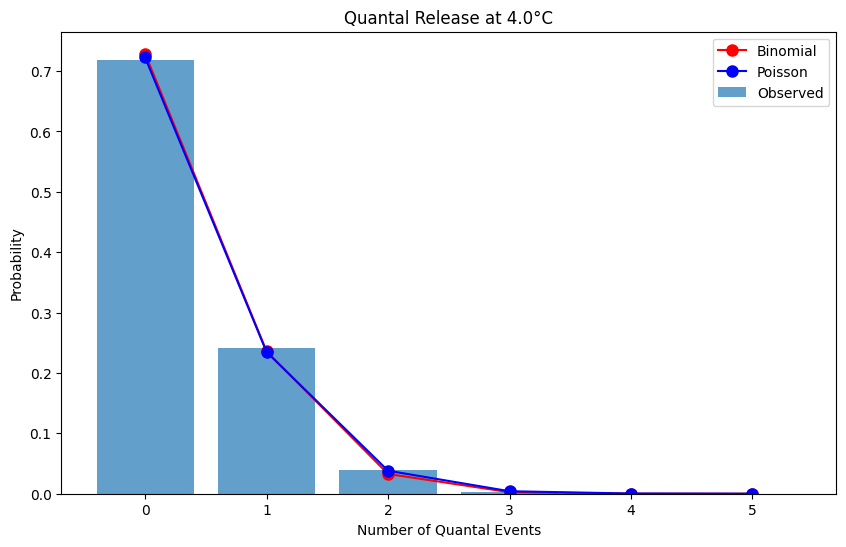

Temperature: 4.0°C
Mean (m): 0.32
Variance (sigma^2): 0.31
Probability (p): 0.04
Number of quanta (n): 7


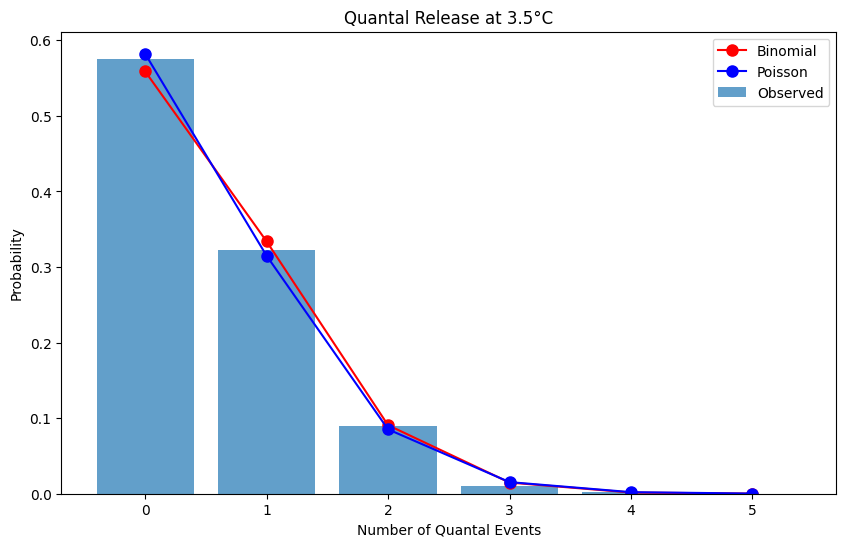

Temperature: 3.5°C
Mean (m): 0.54
Variance (sigma^2): 0.51
Probability (p): 0.05
Number of quanta (n): 11


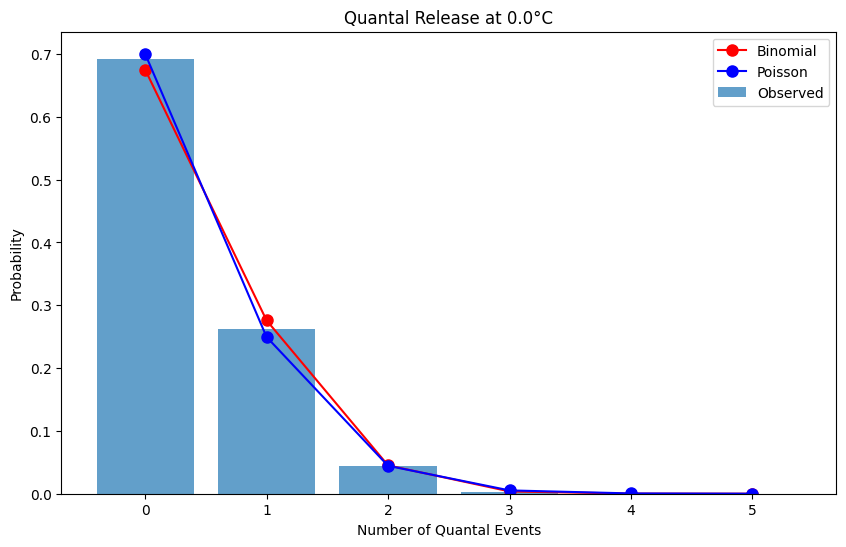

Temperature: 0.0°C
Mean (m): 0.36
Variance (sigma^2): 0.33
Probability (p): 0.08
Number of quanta (n): 5


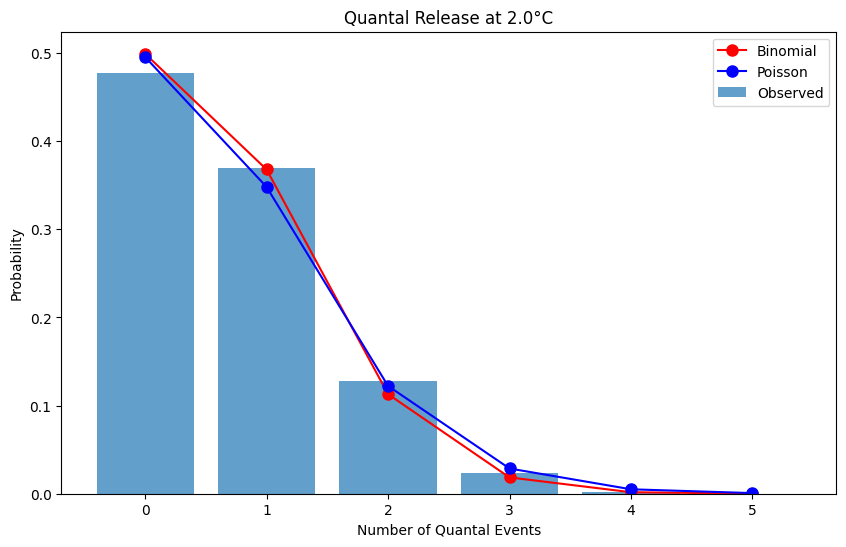

Temperature: 2.0°C
Mean (m): 0.70
Variance (sigma^2): 0.63
Probability (p): 0.11
Number of quanta (n): 6


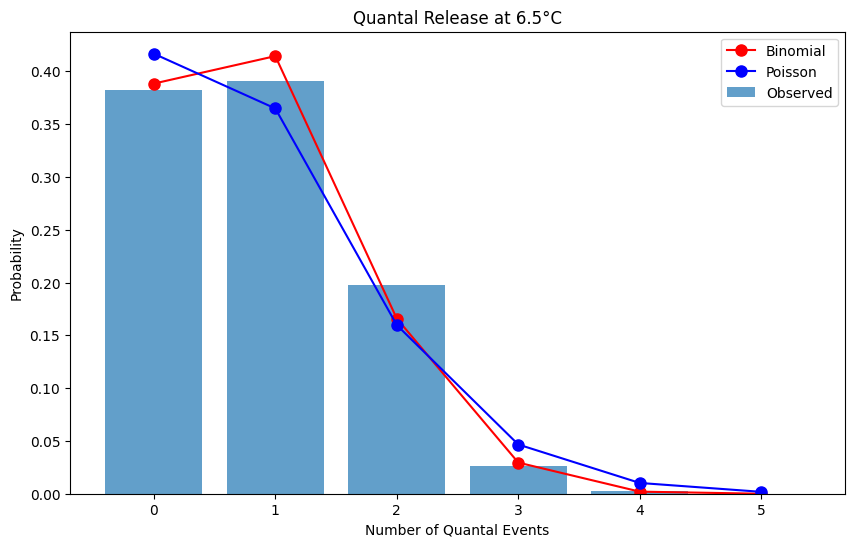

Temperature: 6.5°C
Mean (m): 0.88
Variance (sigma^2): 0.69
Probability (p): 0.21
Number of quanta (n): 4


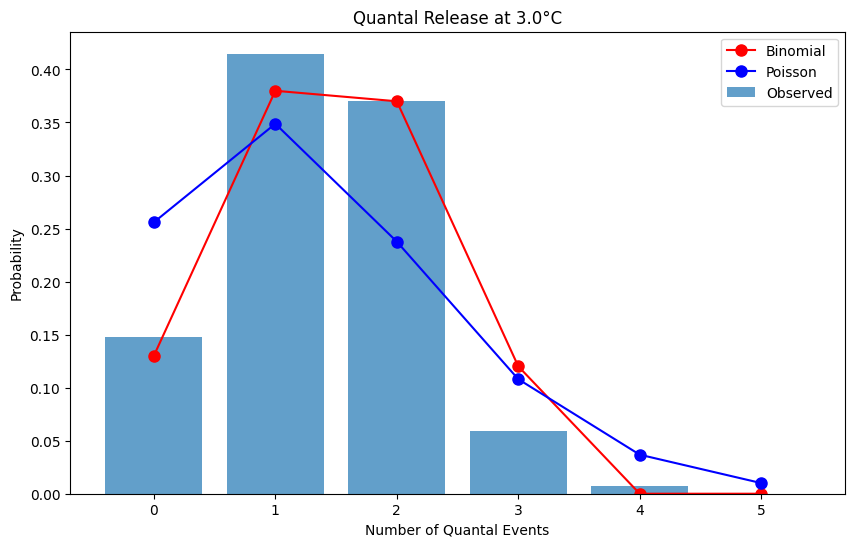

Temperature: 3.0°C
Mean (m): 1.36
Variance (sigma^2): 0.69
Probability (p): 0.49
Number of quanta (n): 3


In [26]:
data = {
    4.0:  {'n0': 615, 'n1': 206, 'n2': 33, 'n3': 2, 'n4': 0, 'n5+': 0},
    3.5:  {'n0': 604, 'n1': 339, 'n2': 94, 'n3': 11, 'n4': 2, 'n5+': 0},
    0.0:  {'n0': 332, 'n1': 126, 'n2': 21, 'n3': 1, 'n4': 0, 'n5+': 0},
    2.0:  {'n0': 573, 'n1': 443, 'n2': 154, 'n3': 28, 'n4': 2, 'n5+': 0},
    6.5:  {'n0': 172, 'n1': 176, 'n2': 89, 'n3': 12, 'n4': 1, 'n5+': 0},
    3.0:  {'n0': 80,  'n1': 224, 'n2': 200, 'n3': 32, 'n4': 4, 'n5+': 0},
}

for temp, counts in data.items():
    total_counts = sum(counts.values())
    #print(total_counts)

    k_values = np.array(list(range(5)) + [5])
    #print(k_values)

    observed_counts = np.array([counts[f'n{i}'] if i < 5 else counts ['n5+'] for i in k_values])
    #print(observed_counts)

    m = np.sum(k_values * observed_counts) / total_counts
    #print(m)

    variance = np.sum(((k_values - m)**2) * observed_counts) / total_counts
    #print(variance)

    p = 1 - (variance / m)
    #print(p)


    n = int(round(m / p))
    #print(n)

    binomial_probs = binom.pmf(k_values, n, p)
    #print(binomial_probs)

    poisson_probs = poisson.pmf(k_values, m)
    #print(poisson_probs)

    plt.figure(figsize=(10, 6))
    plt.bar(k_values, observed_counts / total_counts, label='Observed', alpha=0.7)
    plt.plot(k_values, binomial_probs, 'ro-', label='Binomial', markersize=8)
    plt.plot(k_values, poisson_probs, 'bo-', label='Poisson', markersize=8)
    plt.xlabel('Number of Quantal Events')
    plt.ylabel('Probability')
    plt.title(f'Quantal Release at {temp}°C')
    plt.legend()
    plt.show()

    print(f"Temperature: {temp}°C")
    print(f"Mean (m): {m:.2f}")

    print(f"Variance (sigma^2): {variance:.2f}")
    print(f"Probability (p): {p:.2f}")
    print(f"Number of quanta (n): {n}")

# Additional Resources

Working with the binomial distribution in [Matlab](https://www.mathworks.com/help/stats/binomial-distribution.html), [R](https://www.rdocumentation.org/packages/stats/versions/3.3/topics/Binomial), and [Python](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html).

# Credits

Copyright 2021 by Joshua I. Gold, University of Pennsylvania